In [1]:
# The code was removed by Watson Studio for sharing.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt
from sklearn import preprocessing
import pylab as pl

In [3]:
df["Sport"].value_counts()

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1457
Nordic C

In [4]:
df["Medal"].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
Swimming = df[(df["Sport"] == "Swimming") & (df["Sex"] == "M")]

In [7]:
Swimming.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [8]:
Swimming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13345 entries, 29 to 271088
Data columns (total 15 columns):
ID        13345 non-null int64
Name      13345 non-null object
Sex       13345 non-null object
Age       12910 non-null float64
Height    10578 non-null float64
Weight    10341 non-null float64
Team      13345 non-null object
NOC       13345 non-null object
Games     13345 non-null object
Year      13345 non-null int64
Season    13345 non-null object
City      13345 non-null object
Sport     13345 non-null object
Event     13345 non-null object
Medal     1674 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 1.6+ MB


In [9]:
SwimmingM = Swimming[["Age", "Height", "Weight", "Medal"]]
SwimmingM["Age"].fillna(SwimmingM['Age'].mean(), inplace = True)
SwimmingM["Height"].fillna(SwimmingM['Height'].mean(), inplace = True)
SwimmingM["Weight"].fillna(SwimmingM['Weight'].mean(), inplace = True)
SwimmingM["Medal"].fillna("None", inplace = True)
SwimmingM = SwimmingM.reset_index(drop=True)
SwimmingM.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Age,Height,Weight,Medal
0,26.0,184.310928,78.040567,None
1,22.0,184.310928,78.040567,None
2,22.0,184.310928,78.040567,None
3,30.0,184.310928,78.040567,Bronze
4,30.0,184.310928,78.040567,Bronze


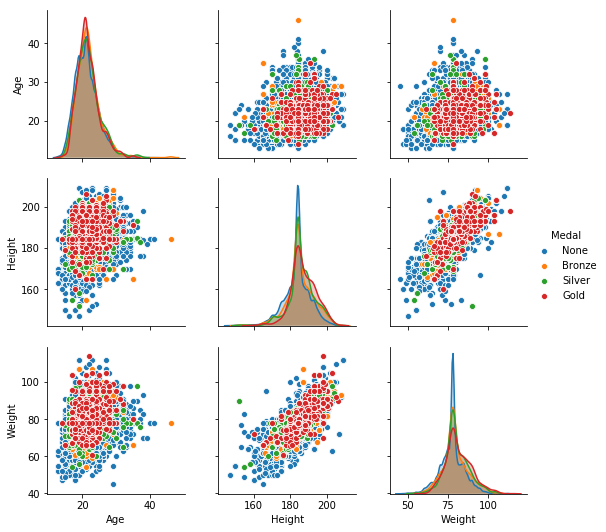

In [10]:
#sns.jointplot(x="Height", y="Weight", data=SwimmingM);
sns.pairplot(SwimmingM, hue="Medal")

In [11]:
SwimmingMed = SwimmingM[(SwimmingM["Medal"] != "None")]

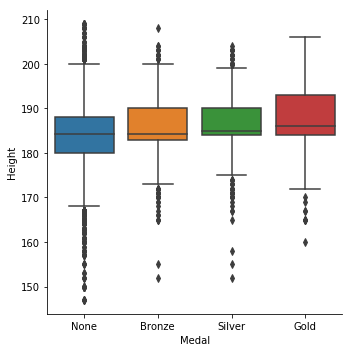

In [12]:
sns.catplot(x="Medal", y="Height", kind="box", data=SwimmingM);

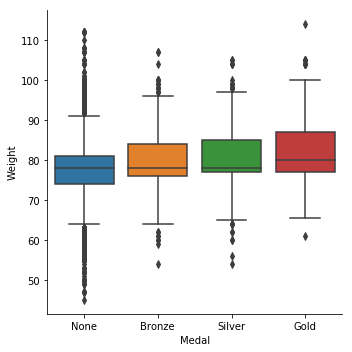

In [13]:
sns.catplot(x="Medal", y="Weight", kind="box", data=SwimmingM);

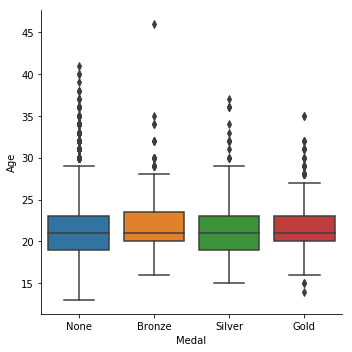

In [14]:
sns.catplot(x="Medal", y="Age", kind="box", data=SwimmingM);

In [15]:
SwimmingF = df[(df["Sport"] == "Swimming") & (df["Sex"] == "F")]

In [16]:
SwimmingF = SwimmingF[["Age", "Height", "Weight", "Medal"]]
SwimmingF["Age"].fillna(SwimmingF['Age'].mean(), inplace = True)
SwimmingF["Height"].fillna(SwimmingF['Height'].mean(), inplace = True)
SwimmingF["Weight"].fillna(SwimmingF['Weight'].mean(), inplace = True)
SwimmingF["Medal"].fillna("None", inplace = True)
SwimmingF = SwimmingF.reset_index(drop=True)
SwimmingF.head()

,Age,Height,Weight,Medal
0,21.0,173.000000,59.000000,None
1,21.0,173.000000,59.000000,None
2,21.0,173.000000,59.000000,Bronze
3,14.0,171.468735,61.482748,None
4,17.0,190.000000,73.000000,None


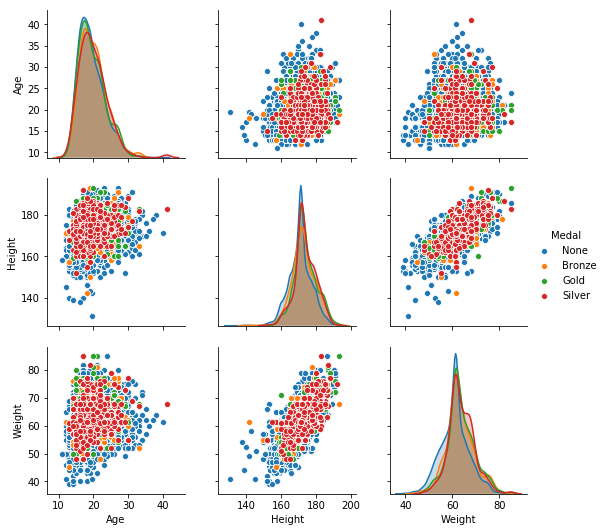

In [17]:
sns.pairplot(SwimmingF, hue="Medal")

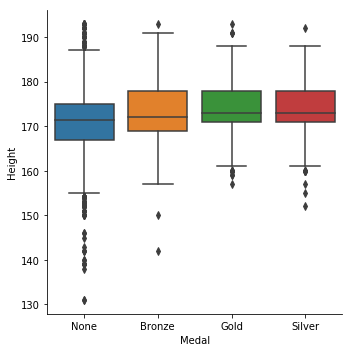

In [18]:
sns.catplot(x="Medal", y="Height", kind="box", data=SwimmingF);

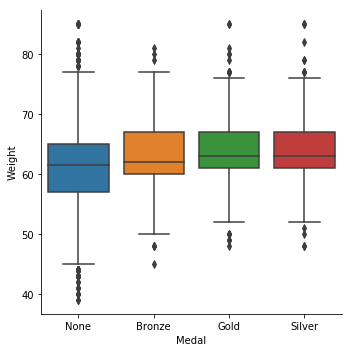

In [19]:
sns.catplot(x="Medal", y="Weight", kind="box", data=SwimmingF);

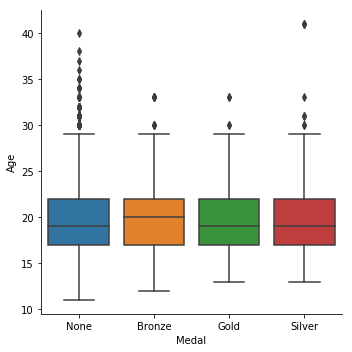

In [20]:
sns.catplot(x="Medal", y="Age", kind="box", data=SwimmingF);

# Change output to Medal vs no medal

In [21]:
SwimmingM['Medal'] = SwimmingM['Medal'].replace(['Gold','Silver','Bronze'],'1')
SwimmingM['Medal'] = SwimmingM['Medal'].replace(['None'],'0')
SwimmingM['Medal'] = SwimmingM['Medal'].astype('float')

In [22]:
SwimmingF['Medal'] = SwimmingF['Medal'].replace(['Gold','Silver','Bronze'],'1')
SwimmingF['Medal'] = SwimmingF['Medal'].replace(['None'],'0')
SwimmingF['Medal'] = SwimmingF['Medal'].astype('float')

Now we have our model paraments (coeff and y-intercept)

equation is: probablity of a medal = 0.01263894xHeight +  0.03336581xWeight + 0.12603848770095058

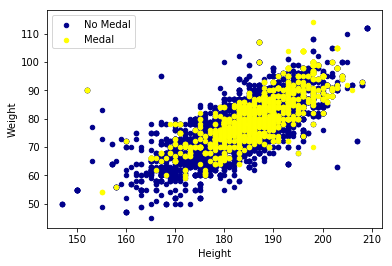

In [23]:
ax = SwimmingM[SwimmingM['Medal'] == 0].plot(kind='scatter', x='Height', y='Weight', color='DarkBlue', label='No Medal');
SwimmingM[SwimmingM['Medal'] == 1].plot(kind='scatter', x='Height', y='Weight', color='Yellow', label='Medal', ax=ax);
plt.show()

In [24]:
SwimmingM["H/W"] = SwimmingM["Height"] / SwimmingM["Weight"]

In [25]:
SwimmingM["W/H"] = SwimmingM["Weight"] / SwimmingM["Height"]

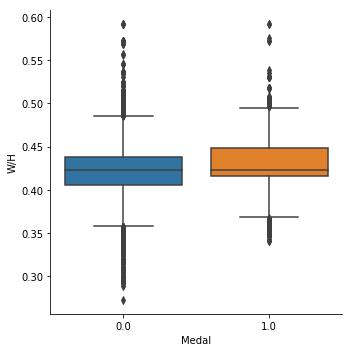

In [26]:
sns.catplot(x="Medal", y="W/H", kind="box", data=SwimmingM);

In [27]:
SwimmingF["W/H"] = SwimmingF["Weight"] / SwimmingM["Height"]

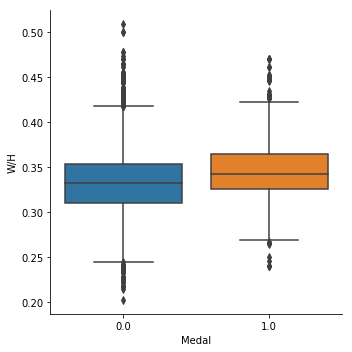

In [28]:
sns.catplot(x="Medal", y="W/H", kind="box", data=SwimmingF);

In [29]:
XM = np.asarray(SwimmingM[["W/H"]])
ym = np.asarray(SwimmingM['Medal'])

In [30]:
from sklearn.model_selection import train_test_split
XM_train, XM_test, ym_train, ym_test = train_test_split( XM, ym, test_size=0.25, random_state=4)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [32]:
poly = PolynomialFeatures(degree=2)
XM_train_poly = poly.fit_transform(XM_train)
XM_train_poly

array([[1.        , 0.39344262, 0.1547971 ],
       [1.        , 0.42341801, 0.17928281],
       [1.        , 0.42341801, 0.17928281],
       ...,
       [1.        , 0.43814433, 0.19197045],
       [1.        , 0.42341801, 0.17928281],
       [1.        , 0.42341801, 0.17928281]])

In [33]:
clf = linear_model.LinearRegression()
yhat = clf.fit(XM_train_poly, ym_train)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.         -1.24282176  2.84911369]
Intercept:  0.1382658802127123


In [34]:
from sklearn.metrics import r2_score

XM_train_poly = poly.fit_transform(XM_test)
yhat = clf.predict(XM_train_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - ym_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - ym_test) ** 2))
yhat.max()

Mean absolute error: 0.22
Residual sum of squares (MSE): 0.11


0.4012514760215726

In [36]:
XF = np.asarray(SwimmingF[["W/H"]])
yf = np.asarray(SwimmingF['Medal'])

In [37]:
from sklearn.model_selection import train_test_split
XF_train, XF_test, yf_train, yf_test = train_test_split( XF, yf, test_size=0.25, random_state=4)

In [38]:
poly = PolynomialFeatures(degree=2)
XF_train_poly = poly.fit_transform(XF_train)
XF_train_poly

array([[1.        , 0.35233161, 0.12413756],
       [1.        , 0.29298317, 0.08583914],
       [1.        , 0.32967033, 0.10868253],
       ...,
       [1.        , 0.30057803, 0.09034715],
       [1.        , 0.36351616, 0.13214399],
       [1.        , 0.36351616, 0.13214399]])

In [39]:
clf = linear_model.LinearRegression()
yhat = clf.fit(XF_train_poly, yf_train)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.          4.92711844 -5.33186148]
Intercept:  -0.9071710384507015


In [40]:
from sklearn.metrics import r2_score

XF_train_poly = poly.fit_transform(XF_test)
yhat = clf.predict(XF_train_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - yf_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - yf_test) ** 2))
yhat.max()

Mean absolute error: 0.24
Residual sum of squares (MSE): 0.13


0.23109983659811628